# Walmart Sales Forecasting Project

This project aims to provide useful insights for a retail store chain and forecast sales for the next 12 weeks using historical sales data.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset
data = pd.read_csv('/Users/omvispute/Desktop/Capstone/Walmart (1).csv')
# Display the first few rows of the dataset
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
# Check for missing values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create new features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

# Display the first few rows of the modified dataset
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18


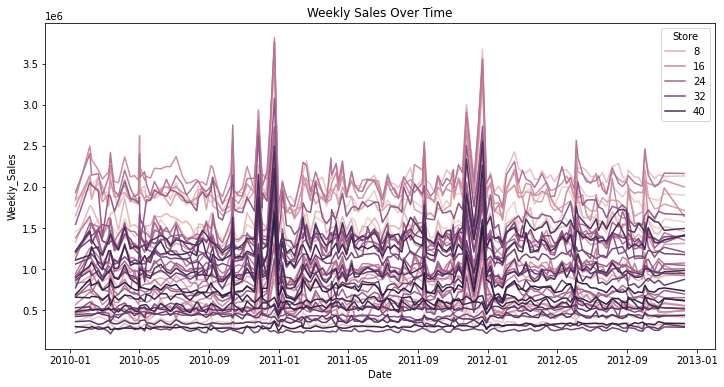

In [8]:
# Plot sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Weekly_Sales', hue='Store')
plt.title('Weekly Sales Over Time')
plt.show()

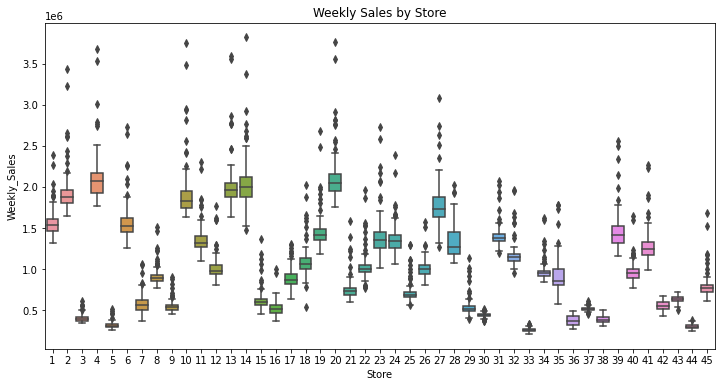

In [9]:
# Boxplot of Weekly Sales by Store
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Store', y='Weekly_Sales')
plt.title('Weekly Sales by Store')
plt.show()

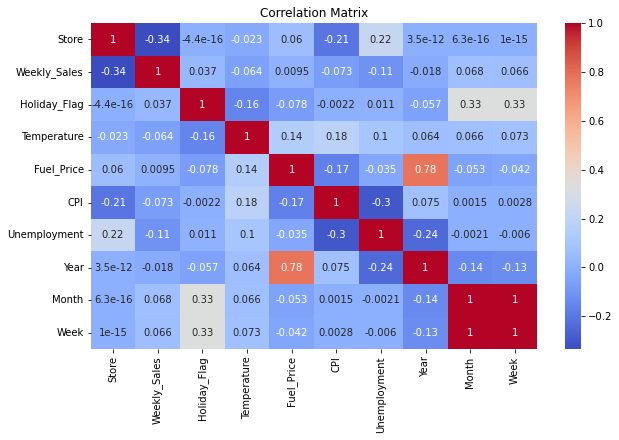

In [10]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Feature selection and train-test split
features = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week']
X = data[features]
y = data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training using Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predicting sales
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display RMSE
rmse

522409.25284241815

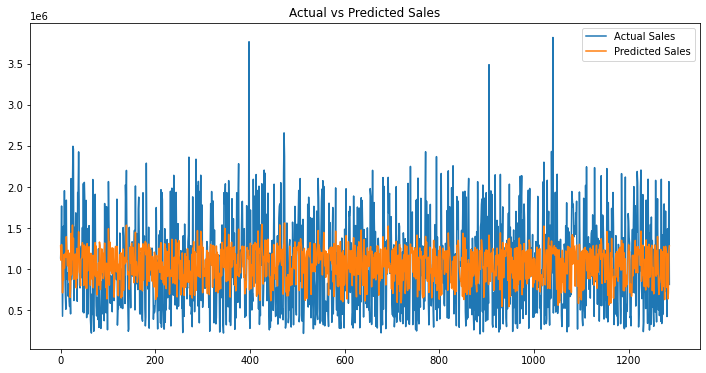

In [13]:
# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

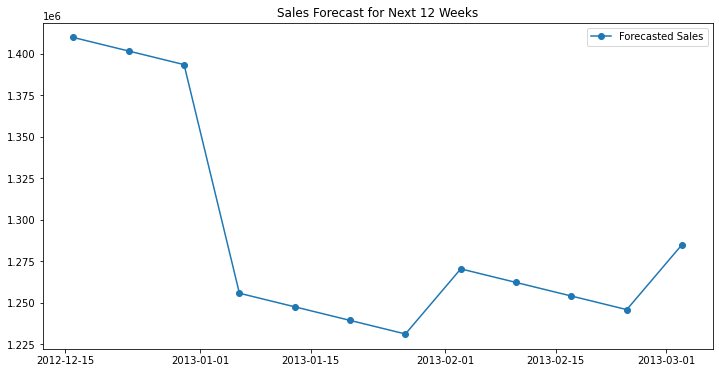

In [14]:
# Forecasting future sales for the next 12 weeks
future_dates = pd.date_range(start=data['Date'].max(), periods=12, freq='W')
future_data = pd.DataFrame({
    'Store': [data['Store'].mode()[0]] * 12,
    'Temperature': [data['Temperature'].mean()] * 12,
    'Fuel_Price': [data['Fuel_Price'].mean()] * 12,
    'CPI': [data['CPI'].mean()] * 12,
    'Unemployment': [data['Unemployment'].mean()] * 12,
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Week': future_dates.isocalendar().week
})

# Predict future sales
future_sales = model.predict(future_data[features])

# Display forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_sales, label='Forecasted Sales', marker='o')
plt.title('Sales Forecast for Next 12 Weeks')
plt.legend()
plt.show()

# Conclusion

In this project, we analyzed Walmart sales data, extracted useful insights, and forecasted sales for the next 12 weeks using a linear regression model. The model's performance was evaluated using RMSE, and future sales were visualized.